### 1.     Plot the data points in D1 and in D2 as separate scatter plots.

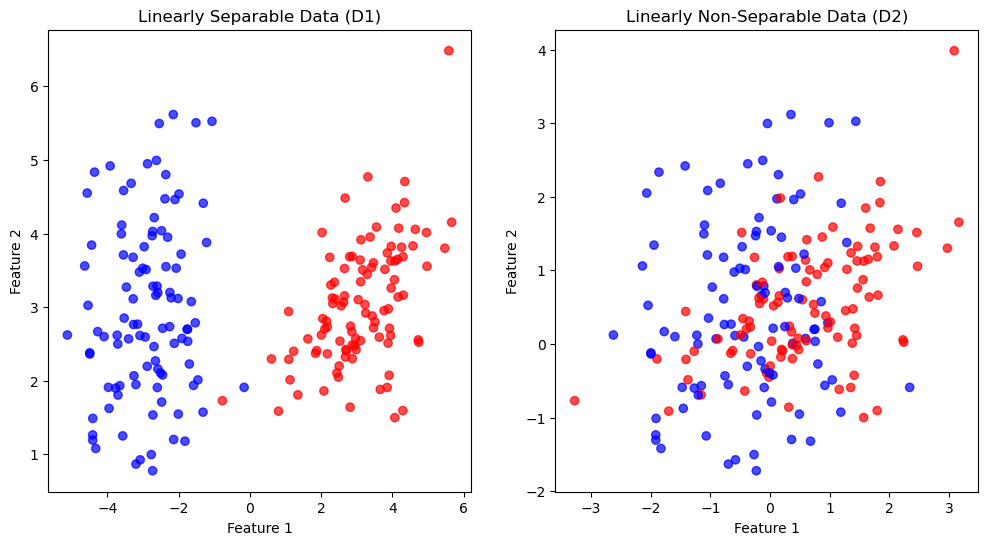

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generating linearly separable data points (D1) :
X1, y1 = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                             n_clusters_per_class=1, class_sep=3.0, random_state=42)

# Generating linearly non-separable data points (D2) :
X2, y2 = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                             n_clusters_per_class=1, class_sep=0.5, random_state=42)

# Plot data points in D1 :
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='bwr', alpha=0.7)
plt.title('Linearly Separable Data (D1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot data points in D2 :
plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='bwr', alpha=0.7)
plt.title('Linearly Non-Separable Data (D2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### 2.     Implement the hard-margin SVM and obtain the results for D1. Report also your test set results on T1.


Hard-margin SVM accuracy on T1: 1.00
Confusion Matrix for T1:
[[10  0]
 [ 0 10]]


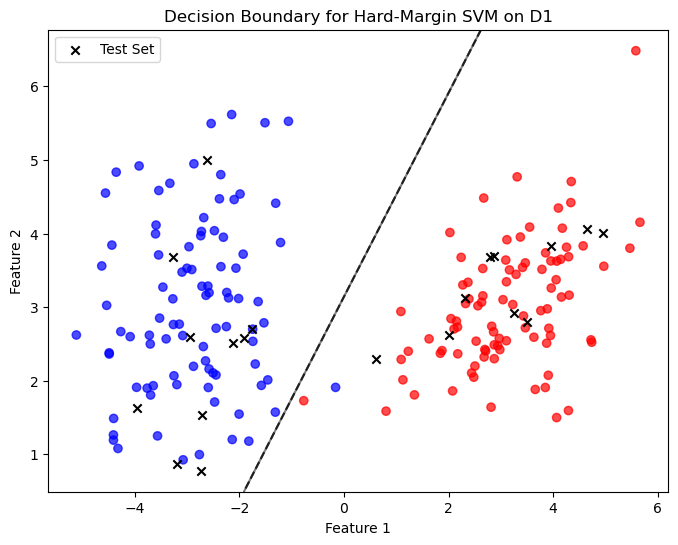

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Randomly picking 10 vectors from each class for test set T1 : 
np.random.seed(42)
test_indices1 = np.hstack((np.random.choice(np.where(y1 == 0)[0], 10, replace=False),
                           np.random.choice(np.where(y1 == 1)[0], 10, replace=False)))
T1 = (X1[test_indices1], y1[test_indices1])

# Removing test set from training set : 
X1_train, y1_train = np.delete(X1, test_indices1, axis=0), np.delete(y1, test_indices1, axis=0)

# Training hard-margin SVM on D1 :
svm_hard = SVC(kernel='linear', C=1e10)  # Very high C for hard margin
svm_hard.fit(X1_train, y1_train)

# Prediction on T1 :
y1_pred = svm_hard.predict(T1[0])
accuracy1 = accuracy_score(T1[1], y1_pred)

# Test set results for T1 :
print(f'Hard-margin SVM accuracy on T1: {accuracy1:.2f}')
print('Confusion Matrix for T1:')
print(confusion_matrix(T1[1], y1_pred))


# Decision boundary for hard-margin SVM on D1
plt.figure(figsize=(8, 6))
plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y1_train, cmap='bwr', alpha=0.7)
plt.scatter(T1[0][:, 0], T1[0][:, 1], c='black', marker='x', label='Test Set')
plt.title('Decision Boundary for Hard-Margin SVM on D1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_hard.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.legend()
plt.show()


### 3. Implement the soft-margin SVM for D2 and report results on T2

Soft-margin SVM accuracy on T2: 0.65
Confusion Matrix for T2:
[[6 4]
 [3 7]]


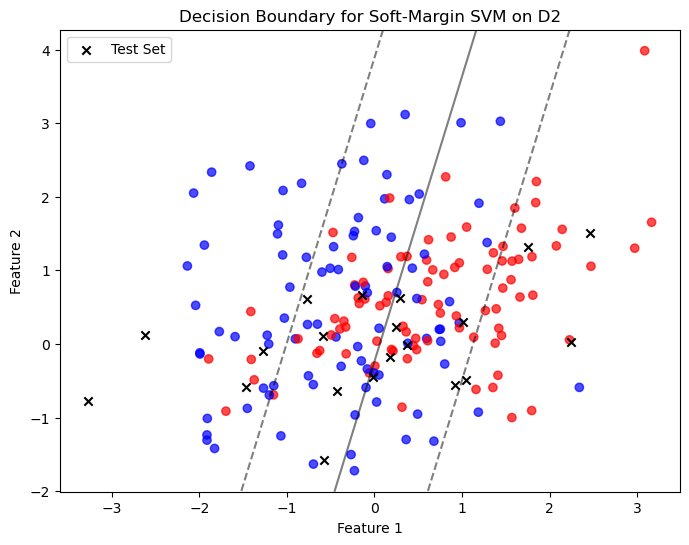

In [10]:
# Randomly picking 10 vectors from each class for test set T2
test_indices2 = np.hstack((np.random.choice(np.where(y2 == 0)[0], 10, replace=False),
                           np.random.choice(np.where(y2 == 1)[0], 10, replace=False)))
T2 = (X2[test_indices2], y2[test_indices2])

# Removing test set from training set
X2_train, y2_train = np.delete(X2, test_indices2, axis=0), np.delete(y2, test_indices2, axis=0)

# Training soft-margin SVM on D2
svm_soft = SVC(kernel='linear', C=1.0)  # Regularization parameter for soft margin
svm_soft.fit(X2_train, y2_train)

# Prediction on T2
y2_pred = svm_soft.predict(T2[0])
accuracy2 = accuracy_score(T2[1], y2_pred)

# Test set results for T2
print(f'Soft-margin SVM accuracy on T2: {accuracy2:.2f}')
print('Confusion Matrix for T2:')
print(confusion_matrix(T2[1], y2_pred))

# Decision boundary for soft-margin SVM on D2
plt.figure(figsize=(8, 6))
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=y2_train, cmap='bwr', alpha=0.7)
plt.scatter(T2[0][:, 0], T2[0][:, 1], c='black', marker='x', label='Test Set')
plt.title('Decision Boundary for Soft-Margin SVM on D2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_soft.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.legend()
plt.show()



### 4. Implement a two-layer multi-layer-perceptron (MLP) and compare results


MLP accuracy on T1: 1.00
Confusion Matrix for MLP on T1:
[[10  0]
 [ 0 10]]
MLP accuracy on T2: 0.60
Confusion Matrix for MLP on T2:
[[6 4]
 [4 6]]

Comparison of SVM and MLP results:
Hard-margin SVM accuracy on T1: 1.00
MLP accuracy on T1: 1.00
Soft-margin SVM accuracy on T2: 0.65
MLP accuracy on T2: 0.60


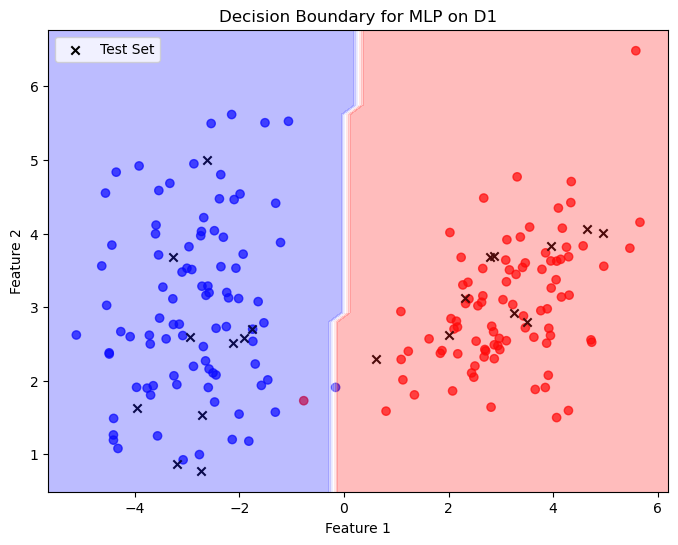

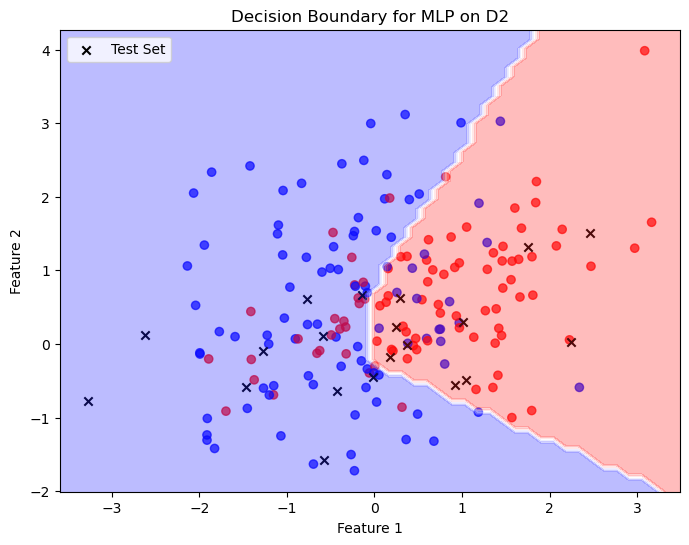

In [11]:
from sklearn.neural_network import MLPClassifier

# MLP for D1
mlp_d1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_d1.fit(X1_train, y1_train)

# Prediction on T1
y1_mlp_pred = mlp_d1.predict(T1[0])
accuracy1_mlp = accuracy_score(T1[1], y1_mlp_pred)

print(f'MLP accuracy on T1: {accuracy1_mlp:.2f}')
print('Confusion Matrix for MLP on T1:')
print(confusion_matrix(T1[1], y1_mlp_pred))

# MLP for D2
mlp_d2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_d2.fit(X2_train, y2_train)

# Prediction on T2
y2_mlp_pred = mlp_d2.predict(T2[0])
accuracy2_mlp = accuracy_score(T2[1], y2_mlp_pred)

print(f'MLP accuracy on T2: {accuracy2_mlp:.2f}')
print('Confusion Matrix for MLP on T2:')
print(confusion_matrix(T2[1], y2_mlp_pred))

#Results comparison : 
print("\nComparison of SVM and MLP results:")
print(f"Hard-margin SVM accuracy on T1: {accuracy1:.2f}")
print(f"MLP accuracy on T1: {accuracy1_mlp:.2f}")
print(f"Soft-margin SVM accuracy on T2: {accuracy2:.2f}")
print(f"MLP accuracy on T2: {accuracy2_mlp:.2f}")


# Decision boundary for MLP on D1
plt.figure(figsize=(8, 6))
plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y1_train, cmap='bwr', alpha=0.7)
plt.scatter(T1[0][:, 0], T1[0][:, 1], c='black', marker='x', label='Test Set')
plt.title('Decision Boundary for MLP on D1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = mlp_d1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
plt.legend()
plt.show()

# Decision boundary for MLP on D2
plt.figure(figsize=(8, 6))
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=y2_train, cmap='bwr', alpha=0.7)
plt.scatter(T2[0][:, 0], T2[0][:, 1], c='black', marker='x', label='Test Set')
plt.title('Decision Boundary for MLP on D2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = mlp_d2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
plt.legend()
plt.show()


